For resonant background, we consider all possible Higgs production mechanisms:
* **gluon-gluon fusion (ggH)**,
* vector-boson fusion (VBFH), 
* associated production with a vector boson (VH),
* top quarks (ttH), and 
* **b-quarks (bbH)** where Higgs decays into two photons.
# VBFH

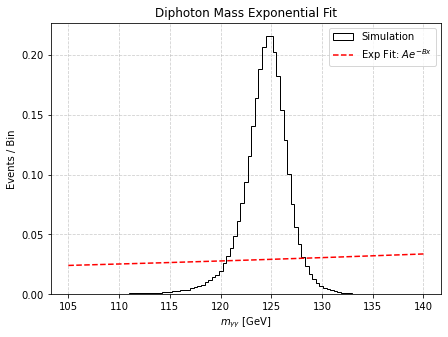

Fitted Parameters: A = 0.009, B = -0.00954


In [16]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/VBFHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"



# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



# VHToGG

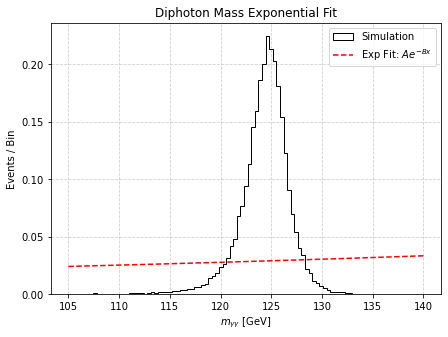

Fitted Parameters: A = 0.009, B = -0.00923


In [10]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/VHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



# ttH

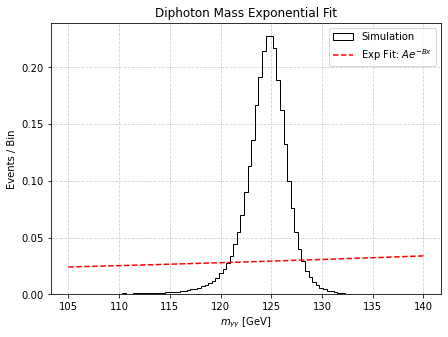

Fitted Parameters: A = 0.009, B = -0.00974


In [12]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/ttHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



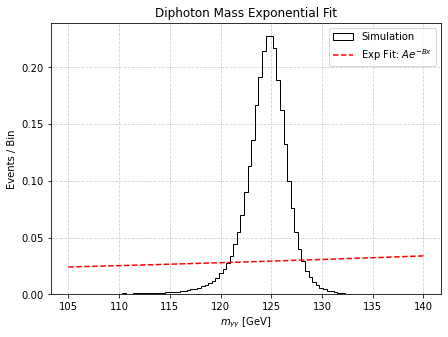

Fitted Parameters: A = 0.009, B = -0.00974


In [13]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/ttHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



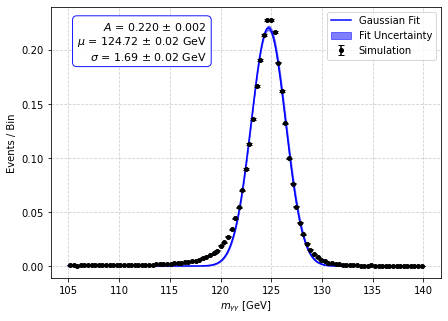

Gaussian Fit Parameters:
  A = 0.220 ± 0.002
  μ = 124.72 ± 0.02 GeV
  σ = 1.69 ± 0.02 GeV


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Create histogram
bins = np.linspace(105, 140, 100)
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  
bin_width = bin_edges[1] - bin_edges[0]

# Poisson errors
hist_errors = np.sqrt(hist) / np.sqrt(len(diphoton_mass_np))

# Fit Gaussian
p0_gaussian = [max(hist), 125, 2]
params_gaussian, covariance_gaussian = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Get parameter errors
param_errors = np.sqrt(np.diag(covariance_gaussian))
A_err, mu_err, sigma_err = param_errors
A_fit, mu_fit, sigma_fit = params_gaussian

# Generate fitted Gaussian curve
x_fit = np.linspace(105, 140, 500)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

# Generate upper and lower uncertainty bounds
y_fit_upper = gaussian(x_fit, A_fit + A_err, mu_fit + mu_err, sigma_fit + sigma_err)
y_fit_lower = gaussian(x_fit, A_fit - A_err, mu_fit - mu_err, sigma_fit - sigma_err)

# Plot histogram with error bars
plt.figure(figsize=(7, 5))
plt.errorbar(bin_centers, hist, yerr=hist_errors, fmt="o", color="black", label="Simulation", markersize=4, capsize=3)

# Plot Gaussian fit
plt.plot(x_fit, y_fit, color="blue", linestyle="-", label="Gaussian Fit")

# Plot uncertainty band
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color="blue", alpha=0.5, label="Fit Uncertainty")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
# plt.title("Diphoton Mass Fit with Uncertainty Band")
plt.grid(True, linestyle="--", alpha=0.6)

# Format parameter text
param_text = (
    r"$A$ = {:.3f} $\pm$ {:.3f}" "\n"
    r"$\mu$ = {:.2f} $\pm$ {:.2f} GeV" "\n"
    r"$\sigma$ = {:.2f} $\pm$ {:.2f} GeV"
).format(A_fit, A_err, mu_fit, mu_err, sigma_fit, sigma_err)

# Add parameter box to the plot
plt.gca().text(
    0.40, 0.95, param_text,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment="top",
    horizontalalignment="right",
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="blue", facecolor="white", alpha=0.9)
)

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_uncertainty.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_uncertainty.png")
plt.show()

# Print Gaussian fit parameters with uncertainties
print(f"Gaussian Fit Parameters:")
print(f"  A = {A_fit:.3f} ± {A_err:.3f}")
print(f"  μ = {mu_fit:.2f} ± {mu_err:.2f} GeV")
print(f"  σ = {sigma_fit:.2f} ± {sigma_err:.2f} GeV")


## Dibjet Mass for 

/tmp/sraj/ipykernel_734159/2478526920.py:51: RuntimeWarning: overflow encountered in power
  return A * x**(-B)


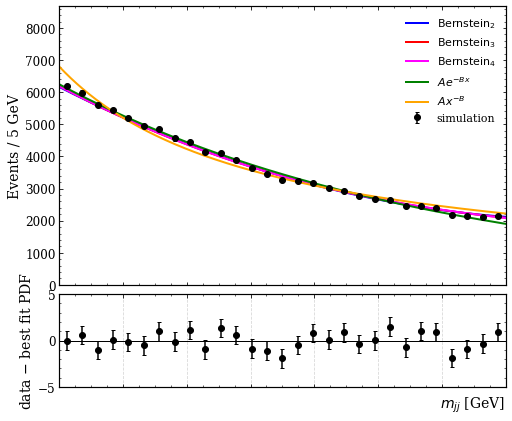

In [29]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.special
from vector import Array as awk

# -- CMS-style matplotlib settings (TCanvas feel) --
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.frameon": False,
    "axes.linewidth": 1.2,
    "font.family": "serif",
    "figure.figsize": (8, 7),
})

# ----------------------------
# Load dijet mass from ROOT
# ----------------------------
file_path_signal = "../../../output_root/v2_production/backgrounds/VBFHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"

with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    dijet_mass = tree["Res_dijet_mass"].array(library="ak")

dijet_mass_np = ak.to_numpy(dijet_mass)

# ----------------------------
# Define fitting functions
# ----------------------------
def bernstein_poly(x, *coeffs):
    n = len(coeffs) - 1
    x_min, x_max = x.min(), x.max()
    x_norm = (x - x_min) / (x_max - x_min)
    return sum(c * scipy.special.comb(n, i) * x_norm**i * (1 - x_norm)**(n - i) for i, c in enumerate(coeffs))

def exp_func(x, A, B):
    return A * np.exp(-B * x)

def power_law_func(x, A, B):
    return A * x**(-B)

# ----------------------------
# Histogram setup
# ----------------------------
bins = np.linspace(60, 200, 30)
hist, bin_edges = np.histogram(dijet_mass_np, bins=bins, density=False)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
errors = np.sqrt(hist)
x_fit = np.linspace(bins[0], bins[-1], 1000)

# Store fit curves
fit_curves = {}
colors = {
    "bern_deg2": "blue",
    "bern_deg3": "red",
    "bern_deg4": "magenta",
    "exp": "green",
    "power": "orange"
}

# Fit Bernstein (deg 2, 3, 4)
for deg in [2, 3, 4]:
    p0 = [1.0] * (deg + 1)
    popt, _ = curve_fit(lambda x, *c: bernstein_poly(x, *c), bin_centers, hist, p0=p0)
    y_fit = bernstein_poly(x_fit, *popt)
    fit_curves[f"bern_deg{deg}"] = (x_fit, y_fit)
    if deg == 3:
        fit_vals_bern3 = bernstein_poly(bin_centers, *popt)  # for residuals

# Fit exponential
popt_exp, _ = curve_fit(exp_func, bin_centers, hist, p0=[100, 0.01])
fit_curves["exp"] = (x_fit, exp_func(x_fit, *popt_exp))

# Fit power law
popt_power, _ = curve_fit(power_law_func, bin_centers, hist, p0=[1e5, 4])
fit_curves["power"] = (x_fit, power_law_func(x_fit, *popt_power))

# Residuals (Bernstein degree 3 only)
residuals = (hist - fit_vals_bern3) / errors

# ----------------------------
# CMS-Style Two-Panel Plot
# ----------------------------
fig = plt.figure(constrained_layout=False)
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.05, top=0.88)

# --- Top: Main Plot ---
ax0 = fig.add_subplot(gs[0])
ax0.errorbar(bin_centers, hist, yerr=errors, fmt='ko', capsize=2, label="simulation")

for label, (x_vals, y_vals) in fit_curves.items():
    legend_label = {
        "bern_deg2": r"$\mathrm{Bernstein}_2$",
        "bern_deg3": r"$\mathrm{Bernstein}_3$",
        "bern_deg4": r"$\mathrm{Bernstein}_4$",
        "exp": r"$Ae^{-Bx}$",
        "power": r"$Ax^{-B}$"
    }[label]
    ax0.plot(x_vals, y_vals, color=colors[label], lw=2, label=legend_label)

ax0.set_ylabel("Events / 5 GeV")
ax0.set_xlim(bins[0], bins[-1])
ax0.set_ylim(0, max(hist) * 1.4)
ax0.set_xticklabels([])
ax0.legend(fontsize=11, loc="upper right")

# --- Bottom: Residuals ---
ax1 = fig.add_subplot(gs[1], sharex=ax0)
ax1.axhline(0, color='black', lw=1)
ax1.errorbar(bin_centers, residuals, yerr=np.ones_like(errors), fmt='ko', capsize=2)
ax1.set_xlabel(r"$m_{jj}$ [GeV]", loc = "right")
ax1.set_ylabel(r"data $-$ best fit PDF")
ax1.set_ylim(-5, 5)
ax1.grid(True, linestyle="--", alpha=0.5)

# --- CMS Banner Outside Plot ---
# fig.text(0.11, 0.85, "CMS", fontsize=17, fontweight='bold')
# fig.text(0.18, 0.85, "Preliminary", fontsize=12, style='italic')
# fig.text(0.83, 0.85, "13 TeV", fontsize=12)

# --- Save or show ---
# plt.savefig("CMS_dijet_mass_Bernstein_fits.pdf")
plt.show()
